In [ ]:

import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split as ts
from sklearn.preprocessing import LabelEncoder
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.metrics import Precision, Recall, AUC
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [3]:

train=pd.read_csv('Training.csv')
test=pd.read_csv('test_data.csv')

In [4]:
train.shape

(4920, 134)

In [5]:
test.shape

(42, 132)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


In [7]:
train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [8]:
train.isnull().sum()


itching                    0
skin_rash                  0
nodal_skin_eruptions       0
continuous_sneezing        0
shivering                  0
                        ... 
blister                    0
red_sore_around_nose       0
yellow_crust_ooze          0
prognosis                  0
Unnamed: 133            4920
Length: 134, dtype: int64

In [9]:

train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [10]:
train=train.drop(["Unnamed: 133"],axis=1)

In [12]:
train.prognosis.value_counts()
with open('disease.txt','w') as f:
    f.write(train.prognosis.value_counts().to_string())

In [ ]:

# Define features and target
X = train.drop(['prognosis'], axis=1)
y = train['prognosis']
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:

print(y)

[15 15 15 ... 38 35 27]


In [ ]:
print(len(X.columns))

132


In [ ]:
# Initialize the Boruta feature selector
rf = RandomForestClassifier(n_jobs=1, class_weight='balanced', max_depth=5)
boruta_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)

In [ ]:
# Perform Boruta feature selection
boruta_selector.fit(np.array(X), np.array(y))

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	132
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	132
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	132
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	132
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	132
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	132
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	132
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	131
Tentative: 	1
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	131
Tentative: 	1
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	131
Tentative: 	1
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	131
Tentative: 	1
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	131
Tentative: 	0
Rejected: 	1


BorutaPy finished running.

Iteration: 	13 / 100
Confirmed: 	131
Tentative: 	0
Rejected: 	1


BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                          n_estimators=324, n_jobs=1,
                                          random_state=RandomState(MT19937) at 0x1DA9DF2F678),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x1DA9DF2F678, verbose=2)

In [ ]:
# Get selected features
selected_features = X.columns[boruta_selector.support_].tolist()

In [ ]:
# Print selected features
print(selected_features)

['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition', 'spotting_ urination', 'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings', 'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat', 'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure', 'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision', 'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'chest_pain', 'weakness_in_limbs', 'fast_heart_rate', 'pain_during_bowel_movements', 'pa

In [ ]:
x_selected = X[selected_features]

In [ ]:
print(x_selected.columns)

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'pus_filled_pimples', 'blackheads', 'scurring', 'skin_peeling',
       'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails',
       'blister', 'red_sore_around_nose', 'yellow_crust_ooze'],
      dtype='object', length=131)


In [ ]:
print(len(x_selected.columns))

131


In [ ]:
rejected_features = X.columns[~boruta_selector.support_]

In [ ]:
print(rejected_features)

Index(['fluid_overload'], dtype='object')


In [ ]:
new_data = X[selected_features].copy()
new_data['prognosis'] = y

# Verify the new DataFrame
new_data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15


In [ ]:
pd.set_option('display.max_rows', None)
label_counts = new_data['prognosis'].value_counts()
print(label_counts)


39    120
33    120
25    120
21    120
17    120
13    120
9     120
5     120
1     120
40    120
36    120
32    120
28    120
24    120
20    120
16    120
12    120
8     120
4     120
29    120
37    120
35    120
2     120
31    120
27    120
23    120
19    120
15    120
11    120
7     120
3     120
38    120
34    120
30    120
26    120
22    120
18    120
14    120
10    120
6     120
0     120
Name: prognosis, dtype: int64


In [ ]:
# dataset is already balanced so smote is not used!!


unique_labels = new_data['prognosis'].unique()
print(unique_labels)


[15  4 16  9 14 33  1 12 17  6 23 30  7 32 28 29  8 11 37 40 19 20 21 22
  3 36 10 34 13 18 39 26 24 25 31  5  0  2 38 35 27]


In [ ]:
label_counts = new_data['prognosis'].value_counts()
unique_labels_with_counts = {label: count for label, count in zip(label_counts.index, label_counts)}
print(unique_labels_with_counts)


{39: 120, 33: 120, 25: 120, 21: 120, 17: 120, 13: 120, 9: 120, 5: 120, 1: 120, 40: 120, 36: 120, 32: 120, 28: 120, 24: 120, 20: 120, 16: 120, 12: 120, 8: 120, 4: 120, 29: 120, 37: 120, 35: 120, 2: 120, 31: 120, 27: 120, 23: 120, 19: 120, 15: 120, 11: 120, 7: 120, 3: 120, 38: 120, 34: 120, 30: 120, 26: 120, 22: 120, 18: 120, 14: 120, 10: 120, 6: 120, 0: 120}


In [ ]:
train_x,test_x, train_y,test_y = ts(x_selected, y, test_size=0.3, random_state=42)


In [ ]:
# Convert labels to one-hot encoding
y_train_categorical = to_categorical(train_y, num_classes=41)
y_test_categorical = to_categorical(test_y, num_classes=41)

X_train_reshaped = train_x.values.reshape(train_x.shape[0], 131, 1)
X_test_reshaped =test_x.values.reshape(test_x.shape[0], 131, 1)




In [ ]:
print(X_train_reshaped)

[[[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 ...

 [[0]
  [1]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[1]
  [1]
  [1]
  ...
  [0]
  [0]
  [0]]

 [[1]
  [1]
  [0]
  ...
  [0]
  [0]
  [0]]]


In [ ]:

# Define the CNN model
model = Sequential([
    Conv1D(32, 3, activation='relu', input_shape=(131, 1)),
    MaxPooling1D(2),
    Conv1D(64, 3, activation='relu'),
    MaxPooling1D(2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(41, activation='softmax')  # 41 output classes
])



# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', Precision(), Recall(), AUC()])

# Train the model
model.fit(X_train_reshaped, y_train_categorical, epochs=4, batch_size=32, validation_data=(X_test_reshaped, y_test_categorical), verbose=1)


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 3444 samples, validate on 1476 samples
Epoch 1/4
3444/3444 [==============================] - 3s 865us/sample - loss: 0.7849 - acc: 0.8754 - precision: 0.9980 - recall: 0.7215 - auc: 0.9920 - val_loss: 0.0133 - val_acc: 0.9966 - val_precision: 0.9966 - val_recall: 0.9966 - val_auc: 1.0000
Epoch 2/4
3444/3444 [==============================] - 2s 699us/sample - loss: 0.0098 - acc: 0.9980 - precision: 0.9985 - recall: 0.9977 - auc: 1.0000 - val_loss: 0.0111 - val_acc: 0.9966 - val_precision: 0.9966 - val_recall: 0.9966 - val_auc: 1.0000
Epoch 3/4
3444/3444 [==============================] - 2s 714us/sample - loss: 0.0069 - acc: 0.9983 - precision: 0.9983 - recall: 0.9977 - auc: 1.0000 - val_loss: 0.0018 - val_acc: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000 - val_auc: 1.0000
Epoch 4/4
3444/3444 [==============================] - 2s 714us/sample - loss: 0.

In [ ]:
# Save the model
model.save('prediction_model.h5')


In [ ]:
from tensorflow.keras.models import load_model

# Load the model
model_saved= load_model('prediction_model.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [ ]:
# Make predictions on the test data
predictions = model_saved.predict(X_test_reshaped)

# Since your model outputs probabilities for each class, you might want to get the predicted class
# You can use argmax to get the index of the highest probability for each sample
predicted_classes = predictions.argmax(axis=1)

# Print the predicted classes
print(predicted_classes)


[ 2  2 24 ... 30 26 11]


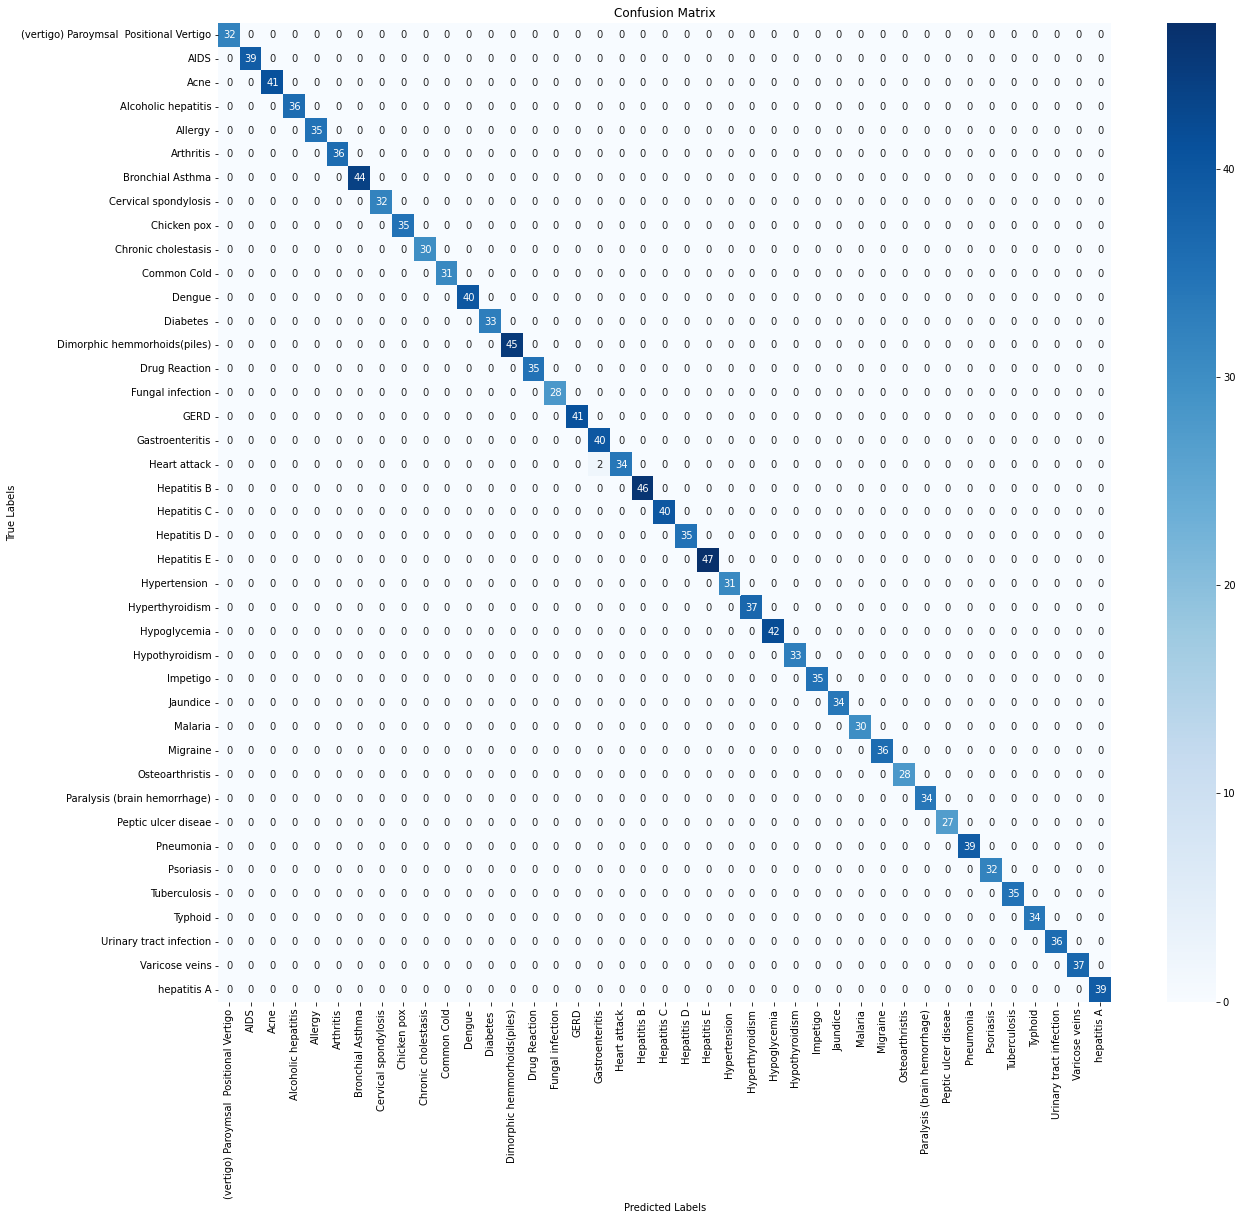

In [ ]:


# Predict probabilities for test set
y_pred_probs = model_saved.predict(X_test_reshaped)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(test_y, y_pred)

# Plot confusion matrix
plt.figure(figsize=(20, 18))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
#prediction
test.head()


In [ ]:
test.info

In [ ]:
test=test.drop(["fluid_overload"],axis=1)

In [ ]:
test.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [ ]:

first_row = test.iloc[[3]]

# Drop the 'prognosis' column if it exists
if 'prognosis' in first_row.columns:
    first_row = first_row.drop(['prognosis'], axis=1)

# Preprocess the data to make it compatible with the model
first_row_processed = first_row[selected_features].values.reshape(1, 131, 1)

# Make predictions using the loaded model
predictions = model_saved.predict(first_row_processed)

# Get the predicted class
predicted_class = np.argmax(predictions)

# Decode the predicted class
predicted_prognosis = label_encoder.inverse_transform([predicted_class])[0]

print("Predicted Prognosis:", predicted_prognosis)


Predicted Prognosis: Chronic cholestasis
